TASK 1

This is a titanic dataset.The dataset consists of traveling information for 891 passengers. The goal is to predict whether a
passenger on the Titanic survived or not.The dataset contains information about individual passengers, such as their age, gender, ticket,class, fare, cabin, and whether or not they survived.

In [1]:
# 1. IMPORTING LIBRARIES 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# 2. LOADING DATASET
data = pd.read_csv("C:\\Users\\User\\Documents\\CODSOFT\\TASK1 - titanic dataset\\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 3. EXPLORING DATASET
# displaying first 10 rows of data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# displaying the last 10 rows of data
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.shape

(891, 12)

In [8]:
# summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 4. DATA CLEANING
# checking null values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
 pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

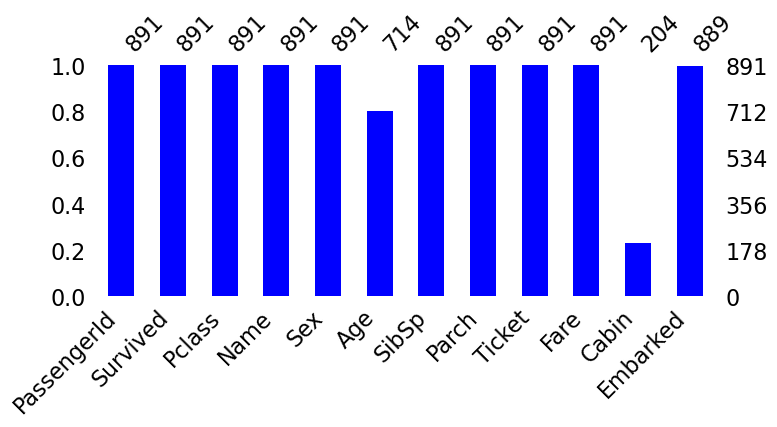

In [11]:
import missingno as msno
msno.bar(data,color='b',figsize = (8,3))

In [12]:
from sklearn.impute import SimpleImputer

# Initialize  the  SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fill null values in the 'Age' column
data['Age'] = imputer.fit_transform(data[['Age']])

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
#drop the name,ticket,cabin,embarked column
data = data.drop(['Name','Ticket','Cabin','Embarked'], axis=1)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

<Axes: >

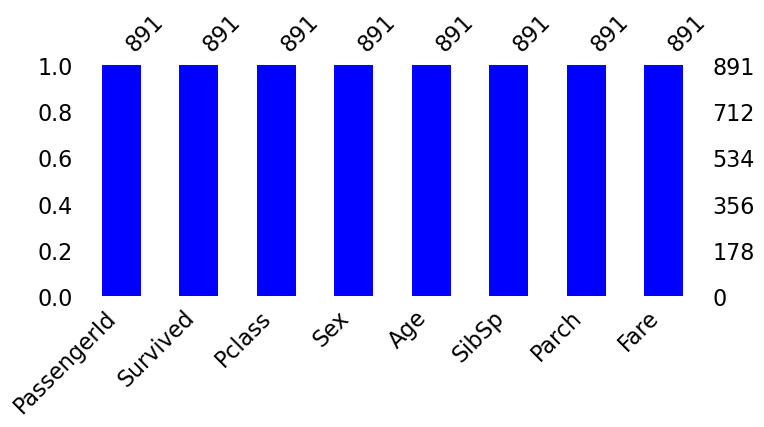

In [15]:
msno.bar(data,color='b',figsize = (8,3))

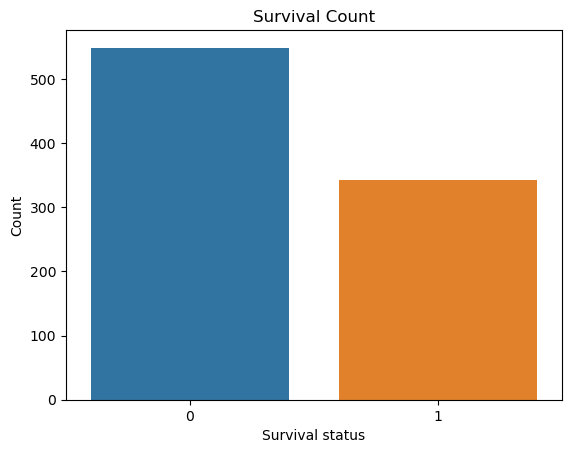

In [16]:
# 5. DATA VISUALIZATION 
# bar plot of survival count
sns.countplot(x ='Survived', data=data)
plt.xlabel('Survival status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

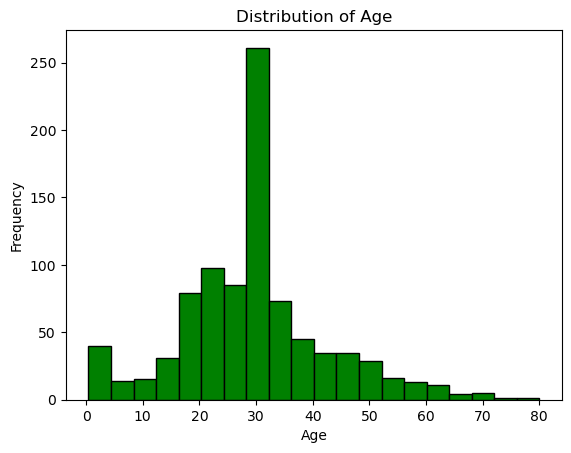

In [17]:
#  histogram  plot of age
plt.hist(data['Age'], bins=20, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

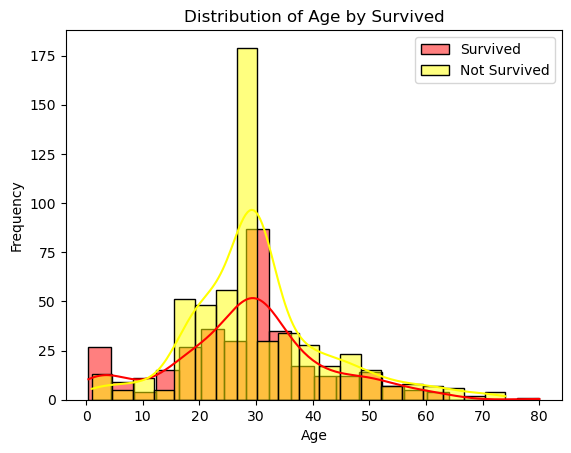

In [18]:
# Separating data for survivors and non-survivors
survived = data[data['Survived'] == 1]['Age'].dropna()
not_survived = data[data['Survived'] == 0]['Age'].dropna()

# Creating histograms for both groups
sns.histplot(survived, bins=20, color='red', kde=True, label='Survived')
sns.histplot(not_survived, bins=20, color='yellow', kde=True, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survived')
plt.legend()

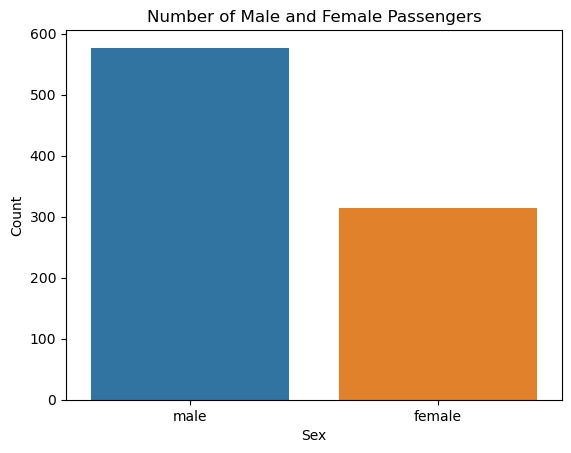

In [19]:
# Number of Male and Female Passengers
sns.countplot(data, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers')
plt.show()

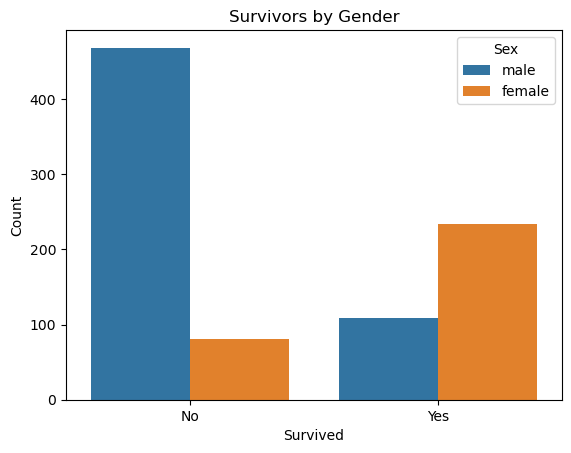

In [20]:
#survivors by gender                   
sns.countplot(data, x='Survived', hue='Sex')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Gender')
plt.show()

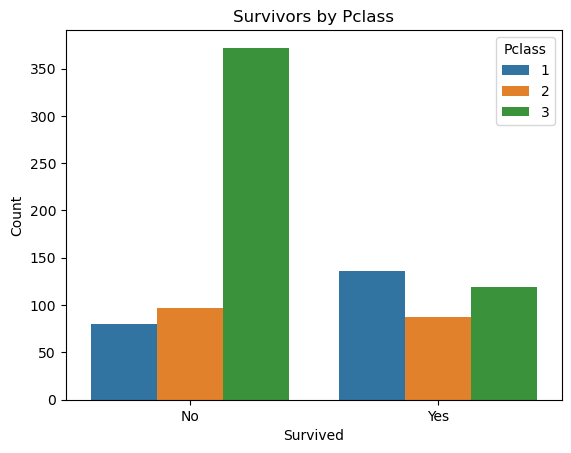

In [21]:
#survivors by pclass  
sns.countplot(data, x='Survived', hue='Pclass')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Pclass')
plt.show()

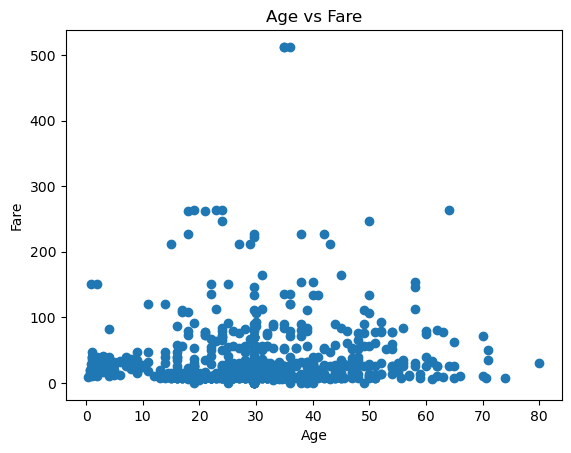

In [22]:
# age vs fare scatter plot
plt.scatter(data['Age'],data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

In [23]:
data.drop(['PassengerId','SibSp','Parch'],axis='columns',inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [24]:
inputs = data.drop('Survived',axis='columns')
target = data['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [25]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [26]:
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [27]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [28]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [29]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.8 KB


In [30]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [31]:
# 6. SPLITTING THE DATASET
#split the data into train and test sets
x_train, x_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)

In [32]:
x_train

,Pclass,Age,Fare,female,male
793,1,29.699118,30.6958,False,True
19,3,29.699118,7.2250,True,False
235,3,29.699118,7.5500,True,False
40,3,40.000000,9.4750,True,False
237,2,8.000000,26.2500,True,False
...,...,...,...,...,...
816,3,23.000000,7.9250,True,False
302,3,19.000000,0.0000,False,True
123,2,32.500000,13.0000,True,False
280,3,65.000000,7.7500,False,True


In [33]:
x_test

,Pclass,Age,Fare,female,male
602,1,29.699118,42.4000,False,True
169,3,28.000000,56.4958,False,True
67,3,19.000000,8.1583,False,True
449,1,52.000000,30.5000,False,True
271,3,25.000000,0.0000,False,True
...,...,...,...,...,...
29,3,29.699118,7.8958,False,True
617,3,26.000000,16.1000,True,False
450,2,36.000000,27.7500,False,True
777,3,5.000000,12.4750,True,False


In [34]:
y_train

793    0
19     1
235    0
40     0
237    1
      ..
816    0
302    0
123    1
280    0
732    0
Name: Survived, Length: 712, dtype: int64

In [35]:
y_test

602    0
169    0
67     0
449    1
271    1
      ..
29     0
617    0
450    0
777    1
703    0
Name: Survived, Length: 179, dtype: int64

In [36]:
inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

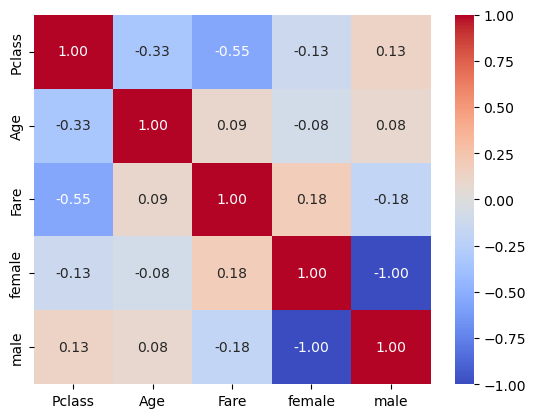

In [37]:
import seaborn as sns
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Create a Random Forest Classifier model with 100 trees and train it on the training data

In [38]:
#7. MODEL BUILDING
#build a Random Forest Classifier model 
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
#make predictions on the test set
y_pred = model.predict(x_test)

In [40]:
#evaluate the model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

In [41]:
# calculating the accuracy and confusion matrix 
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8491620111731844
Confusion Matrix:
[[103  14]
 [ 13  49]]


Accuracy: The model's accuracy of 83.24% is a good indicator of its overall performance.

Confusion Matrix: The matrix shows that the model performs reasonably well in distinguishing between classes.

True Negatives (TN): 95-This means there were 95 instances where the model correctly predicted that a passenger did not survive. 

True Positives (TP): 54- This means there were 54 instances where the model correctly predicted that a passenger did survive.

False Negatives (FN): 13- This means the model did not miss 13 instances where a passenger actually survived. 

False Positives (FP): 17- This means the model did not incorrectly predict survival for 17 passengers who did not survive.

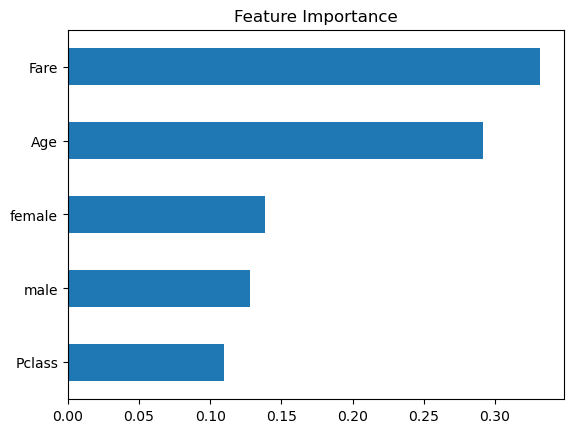

In [42]:
#visualizing the feature importance
feature_imp = pd.Series(model.feature_importances_,index=inputs.columns)
feature_imp.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cv_scores = cross_val_score(model,inputs,target,cv=5)

In [45]:
print("cross validation scores:",cv_scores)
print("mean accuracy:",cv_scores.mean())
print("standard deviation of accuracy:",cv_scores.std())


cross validation scores: [0.79329609 0.81460674 0.84831461 0.80337079 0.83146067]
mean accuracy: 0.8182097796748478
standard deviation of accuracy: 0.019676160106298735
